## Importing Libraries

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

<Figure size 432x216 with 0 Axes>

In [2]:
data=pd.read_csv('Interview_Dataset.csv',sep=',')

In [3]:
data.head()

,Y,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
0,1,A,X1,M1,M1,Y,Y,N1,N,-0.583532,...,-1.320000e-10,-1.130000e-10,-0.00088,-0.000038,-0.000119,-0.000245,-0.000189,-0.790472,1.274462,-4.005563
1,1,B,X2,M1,M2,Y,Y,N2,N,-0.583532,...,-1.310000e-10,-1.130000e-10,-0.00088,0.000010,-0.000087,-0.000238,-0.000185,-0.791634,1.274462,-4.153800
2,0,A,X1,M1,M3,Y,Y,N1,N,-0.583532,...,-1.280000e-10,-1.120000e-10,-0.00088,-0.000038,-0.000015,0.000024,-0.000189,1.496376,1.274462,-4.016141
3,0,B,X1,M1,M2,Y,Y,N1,N,-0.583532,...,-1.330000e-10,-1.130000e-10,-0.00088,-0.000037,0.000019,-0.000246,-0.000094,-0.778778,1.274462,-4.024441
4,0,C,X1,M1,M3,Y,Y,N1,N,-0.583532,...,-1.290000e-10,-1.140000e-10,-0.00088,-0.000038,0.000146,-0.000243,-0.000128,-0.789815,1.274462,-4.025124


In [4]:
data.columns

Index(['Y', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63'],
      dtype='object')

In [5]:
train, test = train_test_split(data, test_size = 0.3, random_state=123 )

In [6]:
train.head()

,Y,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
17325,0,A,X1,M1,M3,Y,Y,N1,N,-0.583532,...,-1.320000e-10,-1.160000e-10,-0.00088,-0.000038,-0.000109,-0.000110,-0.000191,0.372591,1.274462,-4.009881
13544,1,A,X1,M5,M3,Y,N,N1,N,-0.583532,...,-1.350000e-10,-1.130000e-10,-0.00088,-0.000038,-0.000116,-0.000238,-0.000192,1.496780,-4.565023,-3.983135
49844,0,B,X1,M1,M2,Y,Y,N1,N,-0.583532,...,-6.220000e-11,-1.150000e-10,-0.00088,0.000040,-0.000123,-0.000163,0.000004,-0.783472,1.274462,-4.031026
16371,0,A,X1,M2,M1,Y,N,N1,N,-0.583532,...,-1.300000e-10,-1.130000e-10,-0.00088,-0.000038,-0.000119,-0.000249,-0.000189,-0.791929,-4.565023,-3.971975
13084,1,A,X1,M1,M3,Y,Y,N1,N,-0.583532,...,-1.310000e-10,-1.160000e-10,-0.00088,-0.000038,-0.000120,-0.000246,-0.000187,-0.798328,1.274462,-4.006314


In [7]:
test.head()

,Y,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
11872,0,A,X1,M1,M2,Y,Y,N1,N,-0.583532,...,-1.310000e-10,-1.130000e-10,-0.00088,-0.000035,-0.000011,-0.000221,-0.000186,-0.776383,1.274462,-4.011661
40828,0,D,X1,M1,M2,Y,Y,N1,N,-0.583532,...,-1.290000e-10,-1.130000e-10,-0.00088,-0.000007,-0.000087,-0.000245,-0.000187,0.364191,1.274462,-3.994572
36400,0,A,X1,M1,M2,Y,Y,N1,N,-0.583532,...,-1.310000e-10,-1.130000e-10,-0.00088,0.000010,0.000146,0.000429,0.000108,0.353389,1.274462,-4.029181
5166,0,B,X1,M1,M1,Y,Y,N1,N,-0.583532,...,-1.310000e-10,-1.110000e-10,-0.00088,0.000003,-0.000014,0.000074,0.000037,-0.807061,1.274462,-4.064919
30273,1,A,X1,M1,M2,Y,N,N1,N,-0.583532,...,-1.310000e-10,-1.130000e-10,-0.00088,-0.000038,0.002608,0.000023,-0.000001,1.512378,-4.565023,-3.939257


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 17325 to 15725
Data columns (total 63 columns):
Y      35000 non-null int64
X2     35000 non-null object
X3     35000 non-null object
X4     35000 non-null object
X5     35000 non-null object
X6     35000 non-null object
X7     35000 non-null object
X8     35000 non-null object
X9     35000 non-null object
X10    35000 non-null float64
X11    35000 non-null float64
X12    35000 non-null float64
X13    35000 non-null float64
X14    35000 non-null float64
X15    35000 non-null float64
X16    35000 non-null float64
X17    35000 non-null float64
X18    35000 non-null float64
X19    35000 non-null float64
X20    35000 non-null float64
X21    35000 non-null float64
X22    35000 non-null int64
X23    35000 non-null float64
X24    35000 non-null float64
X25    35000 non-null float64
X26    35000 non-null float64
X27    35000 non-null float64
X28    35000 non-null float64
X29    35000 non-null float64
X30    35000 non-null float64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 11872 to 49221
Data columns (total 63 columns):
Y      15000 non-null int64
X2     15000 non-null object
X3     15000 non-null object
X4     15000 non-null object
X5     15000 non-null object
X6     15000 non-null object
X7     15000 non-null object
X8     15000 non-null object
X9     15000 non-null object
X10    15000 non-null float64
X11    15000 non-null float64
X12    15000 non-null float64
X13    15000 non-null float64
X14    15000 non-null float64
X15    15000 non-null float64
X16    15000 non-null float64
X17    15000 non-null float64
X18    15000 non-null float64
X19    15000 non-null float64
X20    15000 non-null float64
X21    15000 non-null float64
X22    15000 non-null int64
X23    15000 non-null float64
X24    15000 non-null float64
X25    15000 non-null float64
X26    15000 non-null float64
X27    15000 non-null float64
X28    15000 non-null float64
X29    15000 non-null float64
X30    15000 non-null float64

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,35000.0,4.021143e-01,4.903318e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
X10,35000.0,-3.549946e-01,1.760003e+00,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,2.240153e+01
X11,35000.0,1.445496e-02,6.604557e-01,-8.717426e-01,-3.737349e-01,1.242728e-01,6.222805e-01,1.618296e+00
X12,35000.0,2.684705e-02,7.867635e-01,-6.670593e-01,-6.670593e-01,-2.168509e-02,6.236891e-01,1.269063e+00
X13,35000.0,5.816327e-03,6.286159e-01,-5.082833e-01,-5.082833e-01,-8.715644e-02,3.339704e-01,1.176224e+00
X14,35000.0,-4.301259e-01,2.227694e-13,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01
X15,35000.0,7.940802e-02,1.227684e+00,-4.659043e-01,-4.659043e-01,-4.659043e-01,-4.659043e-01,5.623083e+00
X16,35000.0,4.480147e-05,4.423789e-04,-8.707020e-04,-2.873910e-04,4.990000e-05,4.725430e-04,9.042020e-04
X17,35000.0,-2.682841e-04,6.657958e-03,-1.629129e-03,-1.178053e-03,-1.173426e-03,-1.165623e-03,1.086713e-01
X18,35000.0,-4.588053e-04,5.414445e-03,-1.954404e-03,-1.244326e-03,-1.234248e-03,-1.221730e-03,8.349123e-02


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,15000.0,4.050667e-01,4.909213e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
X10,15000.0,-3.506165e-01,1.778427e+00,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,2.240153e+01
X11,15000.0,1.530869e-02,6.622524e-01,-8.717426e-01,-3.737349e-01,1.242728e-01,6.222805e-01,1.618296e+00
X12,15000.0,1.135807e-02,7.824773e-01,-6.670593e-01,-6.670593e-01,-2.168509e-02,6.236891e-01,1.269063e+00
X13,15000.0,-9.304132e-03,6.208400e-01,-5.082833e-01,-5.082833e-01,-8.715644e-02,3.339704e-01,1.176224e+00
X14,15000.0,-4.301259e-01,1.505513e-13,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01
X15,15000.0,4.272912e-02,1.180432e+00,-4.659043e-01,-4.659043e-01,-4.659043e-01,-4.659043e-01,5.623083e+00
X16,15000.0,4.322832e-05,4.443137e-04,-8.707020e-04,-2.896590e-04,4.990000e-05,4.725430e-04,9.042020e-04
X17,15000.0,-2.975563e-04,6.234812e-03,-1.629129e-03,-1.178053e-03,-1.173391e-03,-1.165290e-03,1.086713e-01
X18,15000.0,-4.514388e-04,5.469334e-03,-1.954404e-03,-1.244391e-03,-1.234256e-03,-1.221390e-03,8.349123e-02


In [12]:
train.shape

(35000, 63)

In [13]:
test.shape

(15000, 63)

In [14]:
numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [15]:
numeric_var_names

['Y',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63']

In [16]:
cat_var_names

['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']

In [17]:
train_num=train[numeric_var_names]
test_num=test[numeric_var_names]
train_num.head(5)

,Y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63
17325,0,-0.583532,-0.871743,-0.667059,-0.508283,-0.430126,-0.465904,0.000550,-0.001150,-0.001577,...,-1.320000e-10,-1.160000e-10,-0.00088,-0.000038,-0.000109,-0.000110,-0.000191,0.372591,1.274462,-4.009881
13544,1,-0.583532,-0.373735,-0.021685,-0.087156,-0.430126,1.056343,-0.000388,-0.001163,-0.001239,...,-1.350000e-10,-1.130000e-10,-0.00088,-0.000038,-0.000116,-0.000238,-0.000192,1.496780,-4.565023,-3.983135
49844,0,-0.583532,1.120288,1.269063,0.755097,-0.430126,4.100836,0.000015,-0.001170,-0.001236,...,-6.220000e-11,-1.150000e-10,-0.00088,0.000040,-0.000123,-0.000163,0.000004,-0.783472,1.274462,-4.031026
16371,0,-0.583532,-0.373735,1.269063,-0.087156,-0.430126,2.578589,-0.000200,-0.001169,-0.001242,...,-1.300000e-10,-1.130000e-10,-0.00088,-0.000038,-0.000119,-0.000249,-0.000189,-0.791929,-4.565023,-3.971975
13084,1,-0.583532,-0.871743,-0.021685,-0.087156,-0.430126,-0.465904,0.000011,-0.001176,-0.001240,...,-1.310000e-10,-1.160000e-10,-0.00088,-0.000038,-0.000120,-0.000246,-0.000187,-0.798328,1.274462,-4.006314


In [18]:
train_cat=train[cat_var_names]
test_cat=test[cat_var_names]
train_cat.head(5)

,X2,X3,X4,X5,X6,X7,X8,X9
17325,A,X1,M1,M3,Y,Y,N1,N
13544,A,X1,M5,M3,Y,N,N1,N
49844,B,X1,M1,M2,Y,Y,N1,N
16371,A,X1,M2,M1,Y,N,N1,N
13084,A,X1,M1,M3,Y,Y,N1,N


### Data Audit Report

In [19]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [20]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Y,35000.0,0.0,1.407400e+04,4.021143e-01,0.000000e+00,4.903318e-01,2.404253e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
X10,35000.0,0.0,-1.242481e+04,-3.549946e-01,-5.835318e-01,1.760003e+00,3.097612e+00,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,-5.835318e-01,7.078156e+00,2.240153e+01
X11,35000.0,0.0,5.059235e+02,1.445496e-02,1.242728e-01,6.604557e-01,4.362017e-01,-8.717426e-01,-8.717426e-01,-8.717426e-01,-8.717426e-01,-3.737349e-01,1.242728e-01,6.222805e-01,1.120288e+00,1.120288e+00,1.618296e+00,1.618296e+00
X12,35000.0,0.0,9.396467e+02,2.684705e-02,-2.168509e-02,7.867635e-01,6.189968e-01,-6.670593e-01,-6.670593e-01,-6.670593e-01,-6.670593e-01,-6.670593e-01,-2.168509e-02,6.236891e-01,1.269063e+00,1.269063e+00,1.269063e+00,1.269063e+00
X13,35000.0,0.0,2.035714e+02,5.816327e-03,-8.715644e-02,6.286159e-01,3.951579e-01,-5.082833e-01,-5.082833e-01,-5.082833e-01,-5.082833e-01,-5.082833e-01,-8.715644e-02,3.339704e-01,1.176224e+00,1.176224e+00,1.176224e+00,1.176224e+00
X14,35000.0,0.0,-1.505441e+04,-4.301259e-01,-4.301259e-01,2.227694e-13,4.962622e-26,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01,-4.301259e-01
X15,35000.0,0.0,2.779281e+03,7.940802e-02,-4.659043e-01,1.227684e+00,1.507208e+00,-4.659043e-01,-4.659043e-01,-4.659043e-01,-4.659043e-01,-4.659043e-01,-4.659043e-01,-4.659043e-01,1.056343e+00,2.578589e+00,5.623083e+00,5.623083e+00
X16,35000.0,0.0,1.568052e+00,4.480147e-05,4.990000e-05,4.423789e-04,1.956991e-07,-8.707020e-04,-8.569720e-04,-7.335350e-04,-5.598440e-04,-2.873910e-04,4.990000e-05,4.725430e-04,6.355710e-04,6.507610e-04,7.666920e-04,9.042020e-04
X17,35000.0,0.0,-9.389944e+00,-2.682841e-04,-1.173426e-03,6.657958e-03,4.432841e-05,-1.629129e-03,-1.411681e-03,-1.190150e-03,-1.184432e-03,-1.178053e-03,-1.173426e-03,-1.165623e-03,3.350000e-05,5.390000e-05,1.212186e-02,1.086713e-01
X18,35000.0,0.0,-1.605818e+01,-4.588053e-04,-1.234248e-03,5.414445e-03,2.931622e-05,-1.954404e-03,-1.938493e-03,-1.922274e-03,-1.580623e-03,-1.244326e-03,-1.234248e-03,-1.221730e-03,3.746760e-04,8.621520e-04,2.016016e-02,8.349123e-02


In [21]:
num_summary.to_csv('num_summary.csv')

### Handling Outlier

In [22]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

#### No missing in train dataset . So , Missing treatment not required .

In [23]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(cat_summary)

In [24]:
cat_summary

,X2,X3,X4,X5,X6,X7,X8,X9
N,35000,35000,35000,35000,35000,35000,35000,35000
NMISS,0,0,0,0,0,0,0,0
ColumnsNames,B 16108 A 12846 C 3557 D 2172 E ...,X1 34383 X3 109 X6 104 X5 10...,M1 28444 M2 3873 M5 1762 M4 31...,"M2 14317 M1 11794 M3 8889 Name: X5, ...","Y 32890 N 2110 Name: X6, dtype: int64","Y 27799 N 7201 Name: X7, dtype: int64",N1 27862 N3 5778 N6 117 N12 ...,"N 35000 Name: X9, dtype: int64"


### Dummy Variable Creation

In [25]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [26]:
#for c_feature in categorical_features
for c_feature in ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

,X2_B,X2_C,X2_D,X2_E,X3_X2,X3_X3,X3_X4,X3_X5,X3_X6,X3_X7,...,X8_N14,X8_N15,X8_N2,X8_N3,X8_N4,X8_N5,X8_N6,X8_N7,X8_N8,X8_N9
17325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49844,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final file for analysis

In [27]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

,Y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_N14,X8_N15,X8_N2,X8_N3,X8_N4,X8_N5,X8_N6,X8_N7,X8_N8,X8_N9
17325,0,-0.583532,-0.871743,-0.667059,-0.508283,-0.430126,-0.465904,0.000550,-0.001150,-0.001577,...,0,0,0,0,0,0,0,0,0,0
13544,1,-0.583532,-0.373735,-0.021685,-0.087156,-0.430126,1.056343,-0.000388,-0.001163,-0.001239,...,0,0,0,0,0,0,0,0,0,0
49844,0,-0.583532,1.120288,1.269063,0.755097,-0.430126,4.100836,0.000015,-0.001170,-0.001236,...,0,0,0,0,0,0,0,0,0,0
16371,0,-0.583532,-0.373735,1.269063,-0.087156,-0.430126,2.578589,-0.000200,-0.001169,-0.001242,...,0,0,0,0,0,0,0,0,0,0
13084,1,-0.583532,-0.871743,-0.021685,-0.087156,-0.430126,-0.465904,0.000011,-0.001176,-0.001240,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

,Y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_N14,X8_N15,X8_N2,X8_N3,X8_N4,X8_N5,X8_N6,X8_N7,X8_N8,X8_N9
Y,1.000000,-0.078696,-0.376531,-0.388244,-0.370901,-3.271694e-15,-0.222950,-0.414395,-0.087056,-0.031391,...,0.063949,-0.042784,0.063949,0.526201,0.066568,-0.044337,-0.047495,0.068154,0.068154,0.064943
X10,-0.078696,1.000000,0.023781,0.164923,0.125709,-2.500886e-13,-0.007395,0.013146,0.081357,0.130162,...,-0.007644,-0.007604,-0.007644,-0.010883,-0.007957,-0.007879,-0.008441,-0.008146,-0.008146,-0.007762
X11,-0.376531,0.023781,1.000000,0.211638,0.175262,-1.019952e-15,0.095416,0.383035,0.116865,0.158298,...,-0.070371,0.008675,0.008720,-0.284341,-0.073252,0.008989,0.009630,0.009294,-0.074998,0.008856
X12,-0.388244,0.164923,0.211638,1.000000,0.919192,-1.316999e-14,0.544084,0.216190,0.053880,0.015923,...,-0.046255,-0.046013,-0.046255,-0.385751,-0.048149,-0.047683,-0.051080,-0.049297,-0.049297,-0.046974
X13,-0.370901,0.125709,0.175262,0.919192,1.000000,7.431939e-16,0.533230,0.190021,0.052924,-0.003327,...,-0.042891,-0.042666,-0.042891,-0.358407,-0.044647,-0.044215,-0.047365,-0.045711,-0.045711,-0.043558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X8_N5,-0.044337,-0.007879,0.008989,-0.047683,-0.044215,-1.004604e-15,-0.024014,0.006598,-0.013224,-0.010423,...,-0.002835,-0.002820,-0.002835,-0.024040,-0.002951,1.000000,-0.003131,-0.003022,-0.003022,-0.002879
X8_N6,-0.047495,-0.008441,0.009630,-0.051080,-0.047365,-7.176366e-16,-0.025725,-0.034200,-0.014137,-0.011173,...,-0.003037,-0.003021,-0.003037,-0.025753,-0.003162,-0.003131,1.000000,-0.003237,-0.003237,-0.003084
X8_N7,0.068154,-0.008146,0.009294,-0.049297,-0.045711,-1.950851e-15,-0.024827,-0.024421,-0.013447,-0.010716,...,-0.002931,-0.002916,-0.002931,-0.024854,-0.003051,-0.003022,-0.003237,1.000000,-0.003124,-0.002977
X8_N8,0.068154,-0.008146,-0.074998,-0.049297,-0.045711,-1.166344e-15,-0.024827,-0.020943,-0.013664,-0.011345,...,-0.002931,-0.002916,-0.002931,-0.024854,-0.003051,-0.003022,-0.003237,-0.003124,1.000000,-0.002977


In [29]:
corrm.to_csv('corrm.csv')

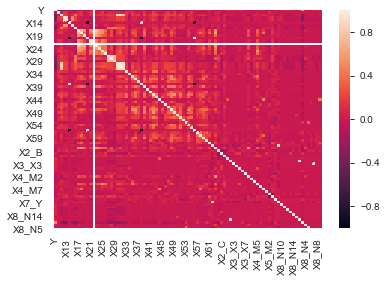

In [30]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

#### Variable reduction using WOE or log(odds)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

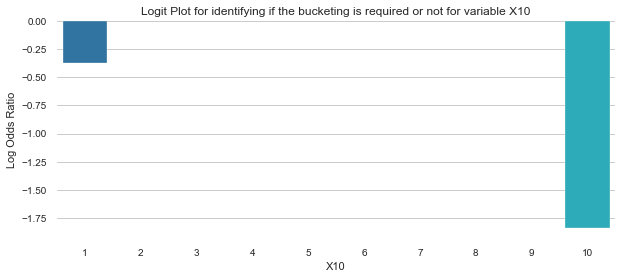

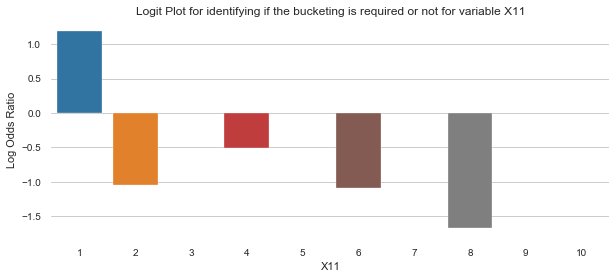

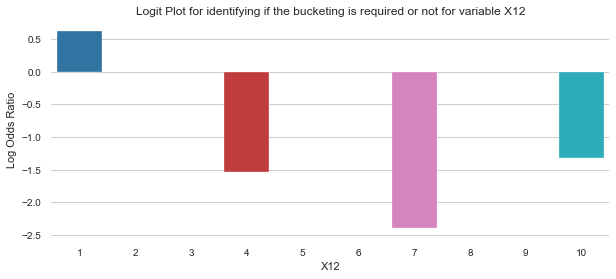

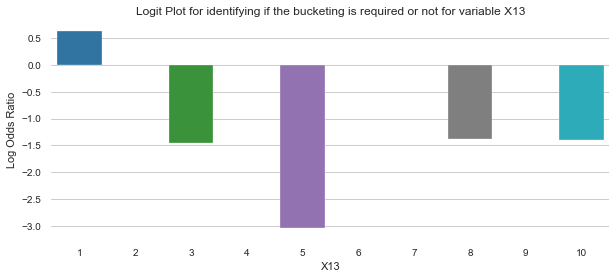

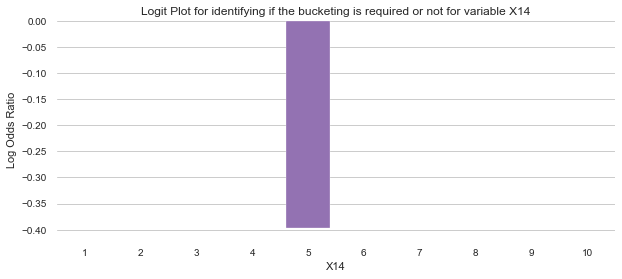

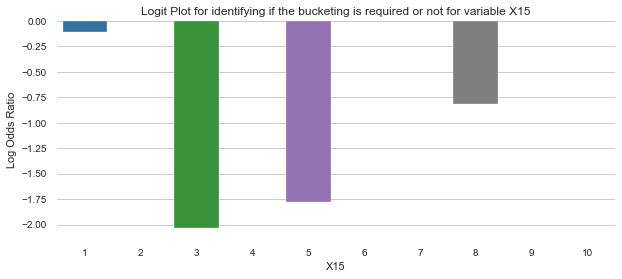

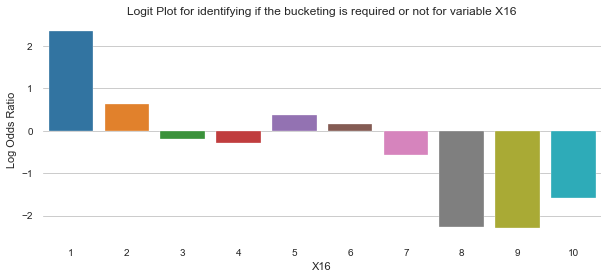

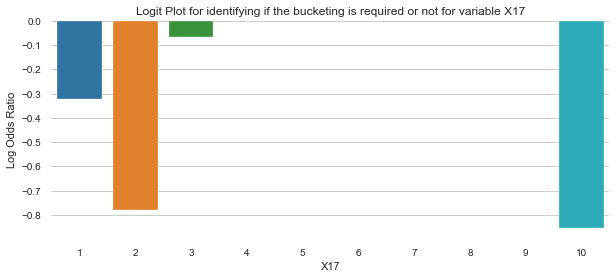

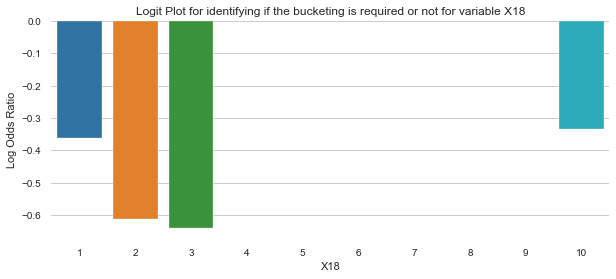

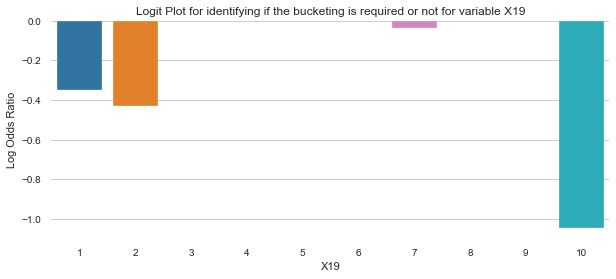

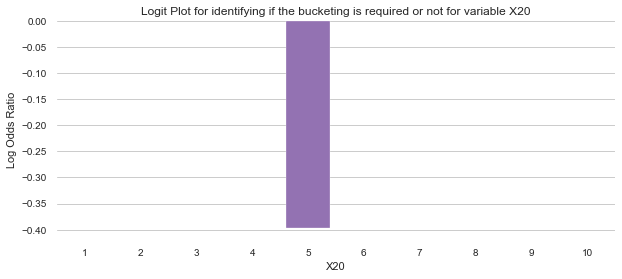

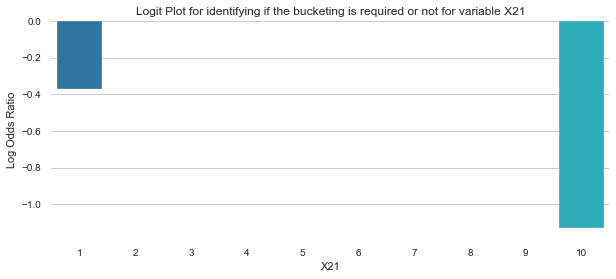

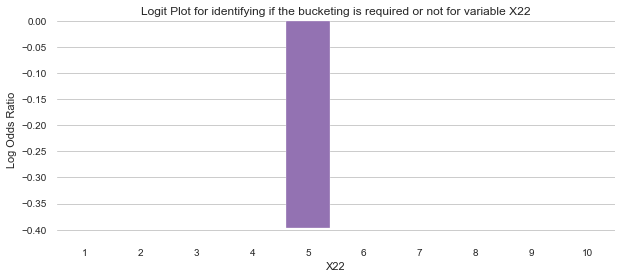

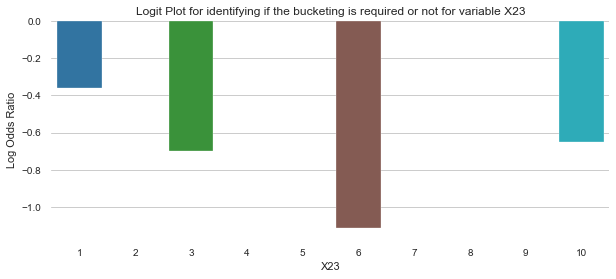

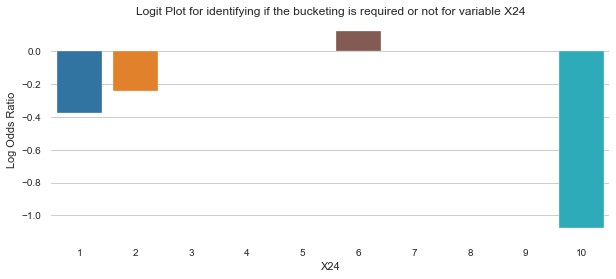

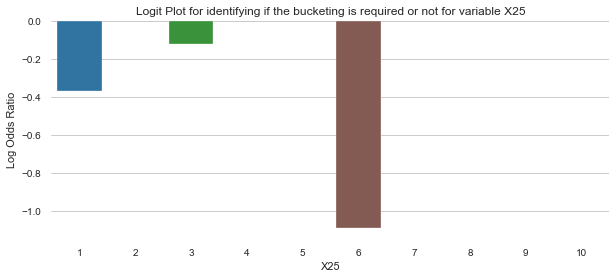

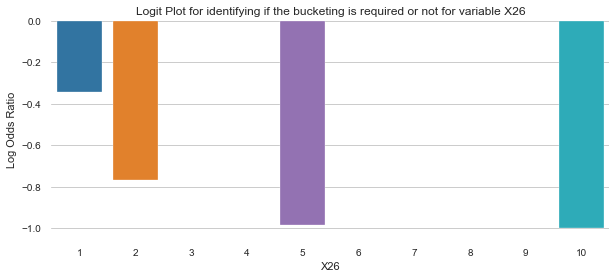

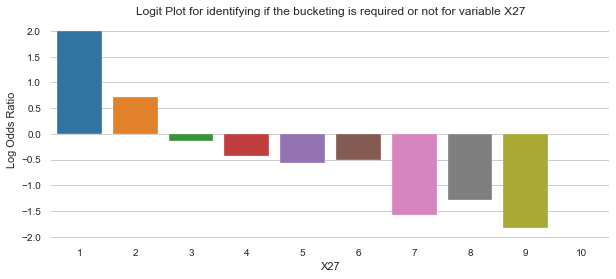

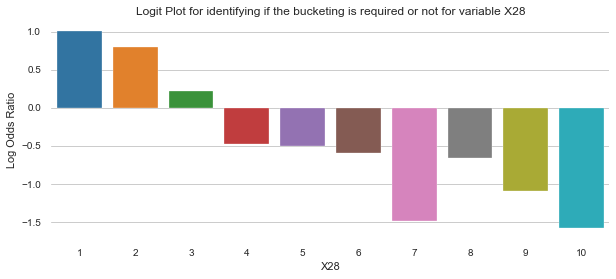

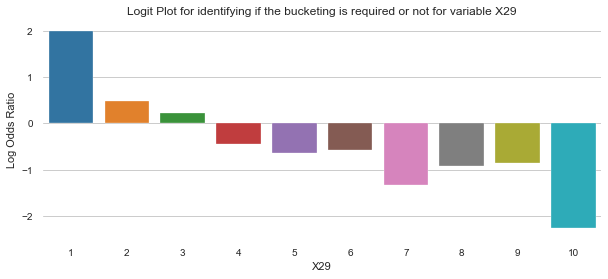

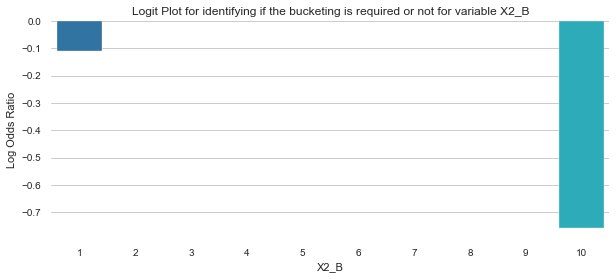

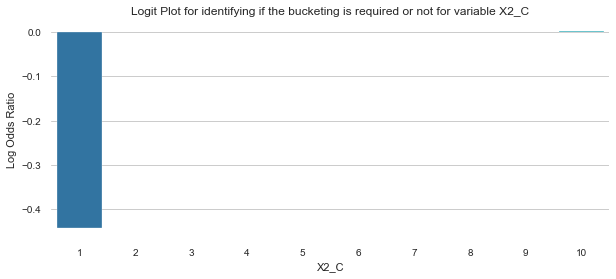

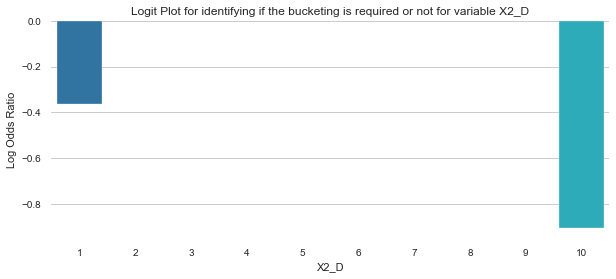

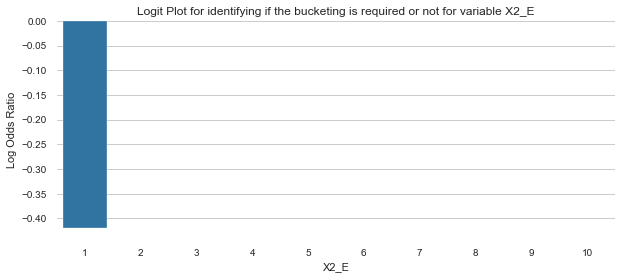

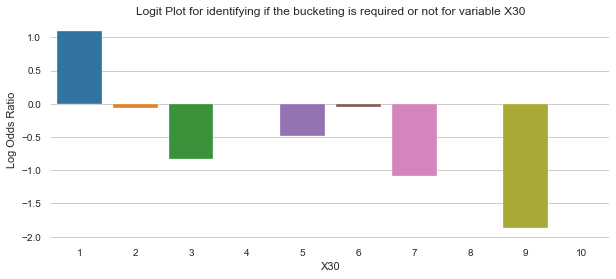

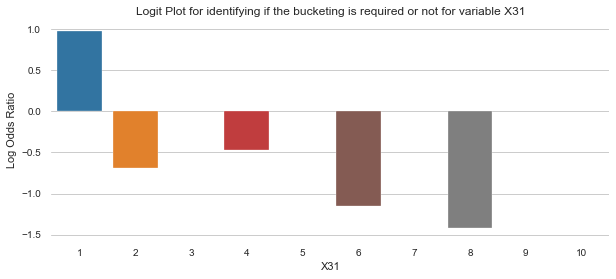

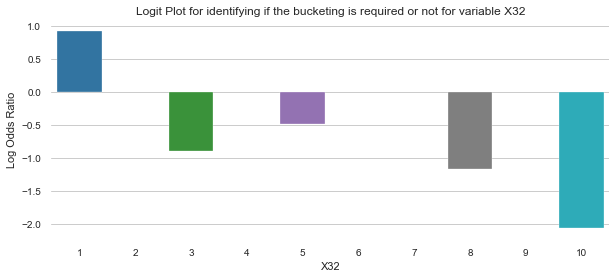

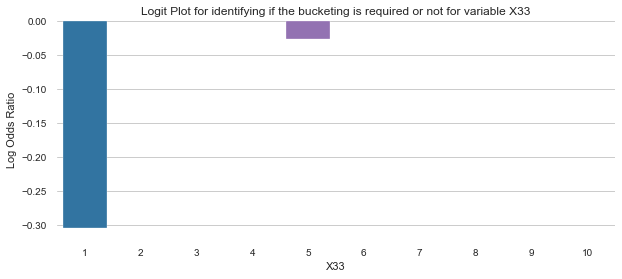

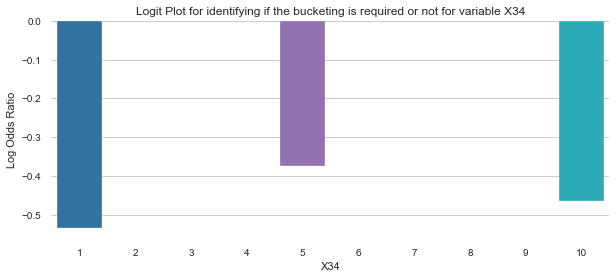

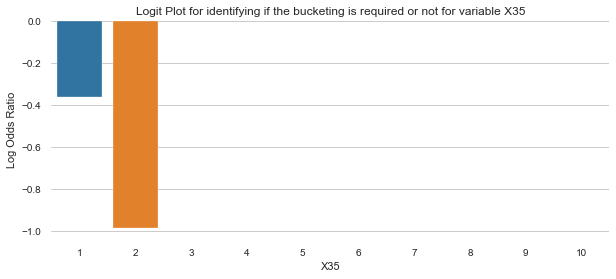

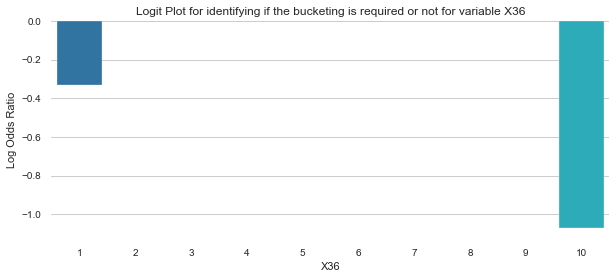

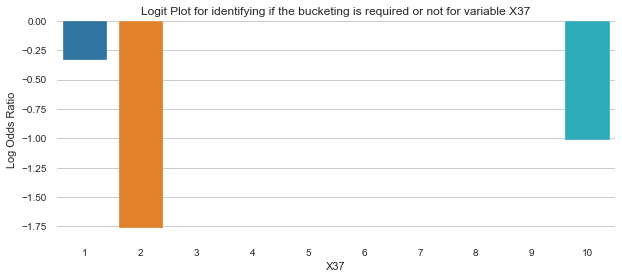

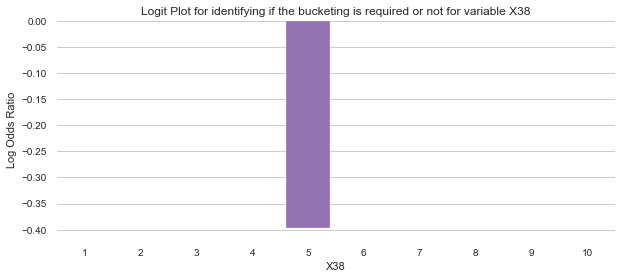

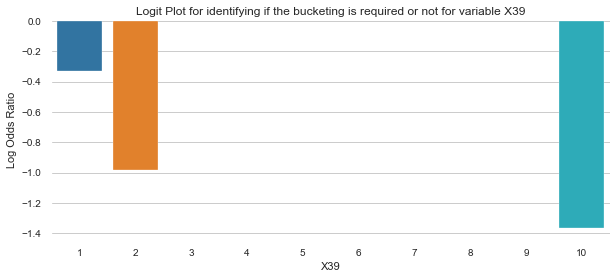

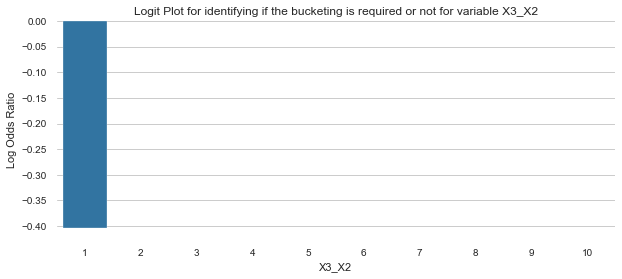

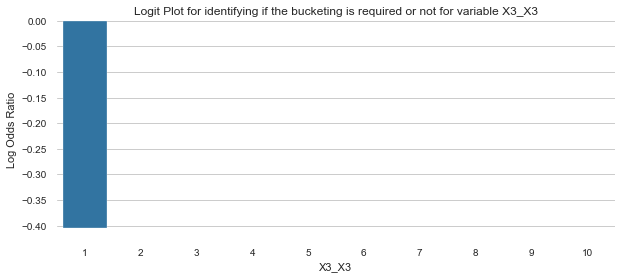

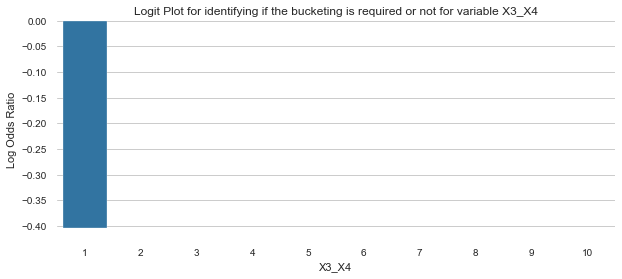

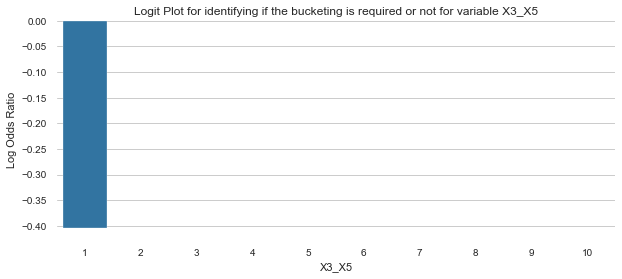

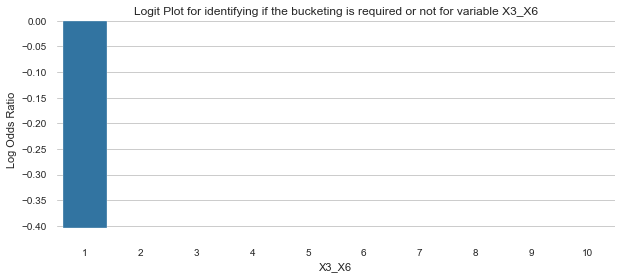

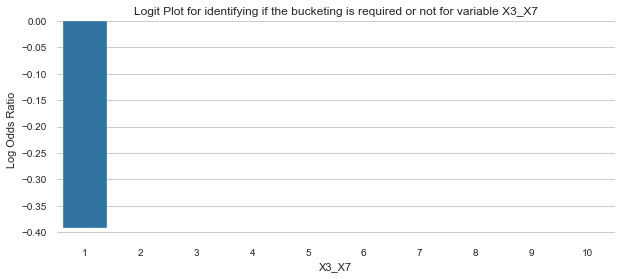

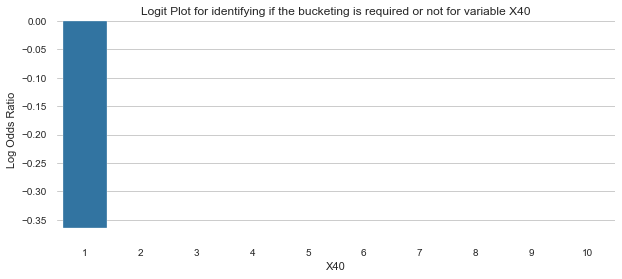

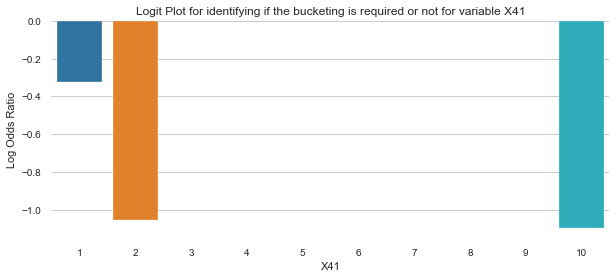

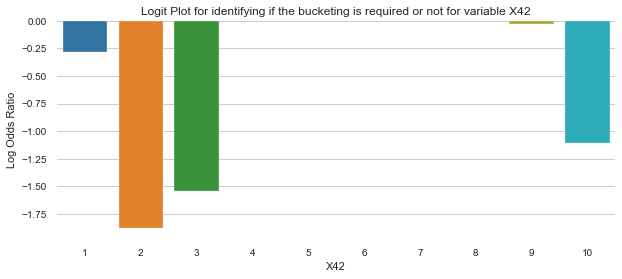

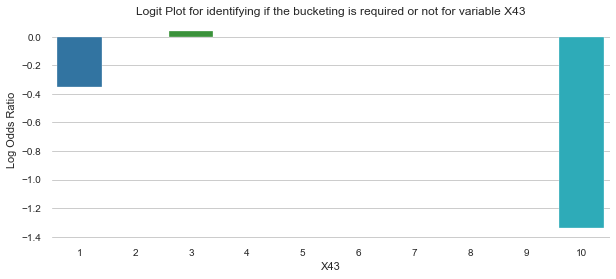

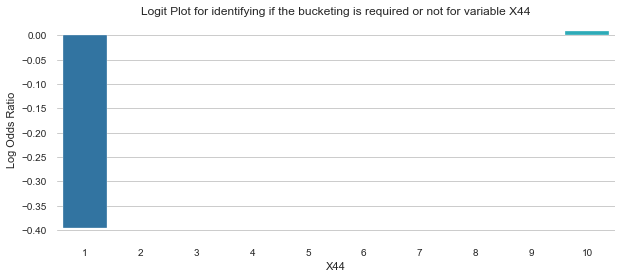

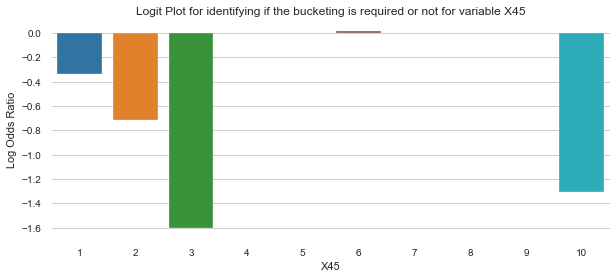

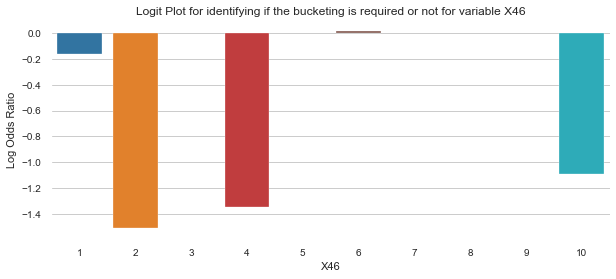

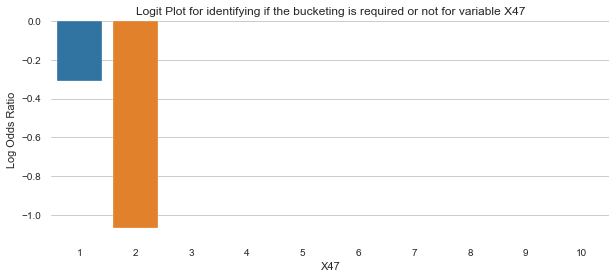

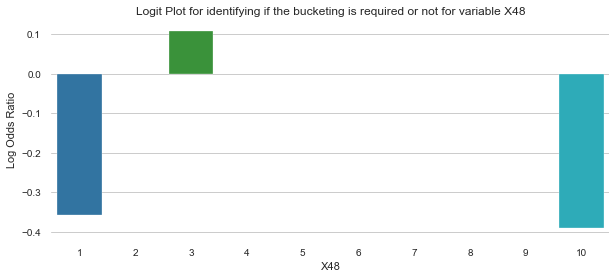

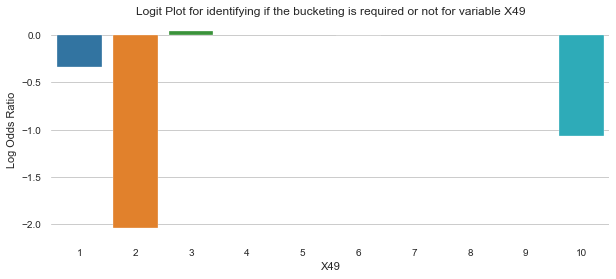

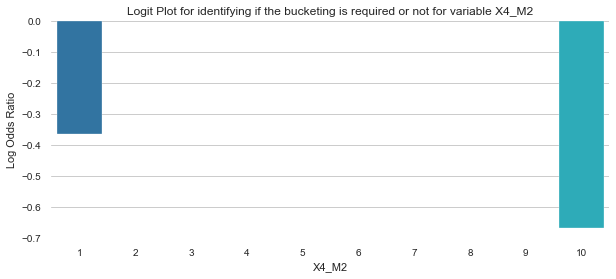

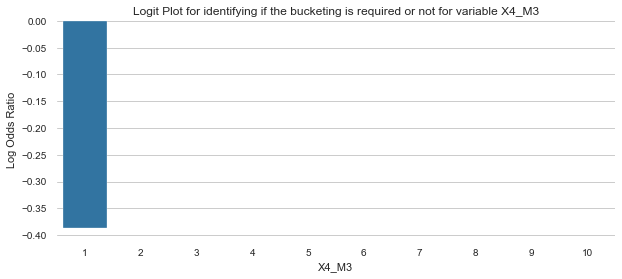

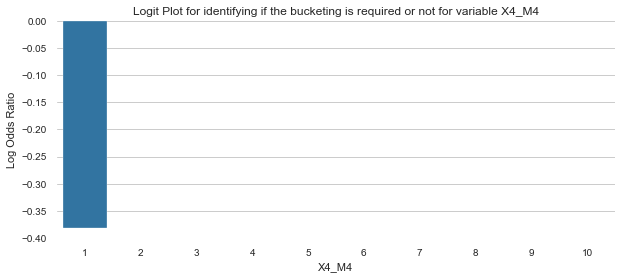

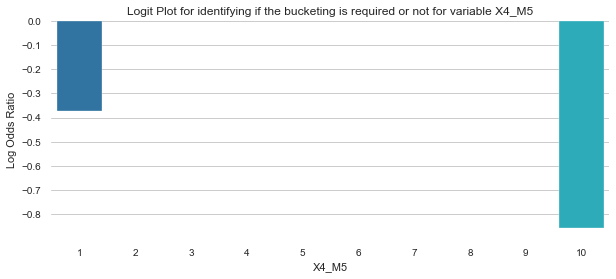

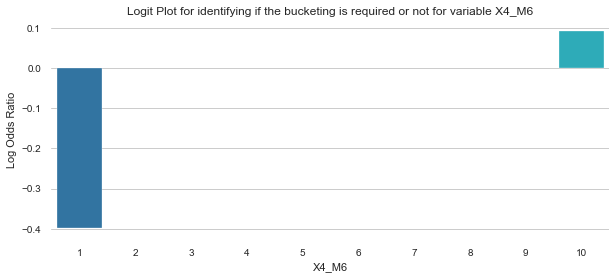

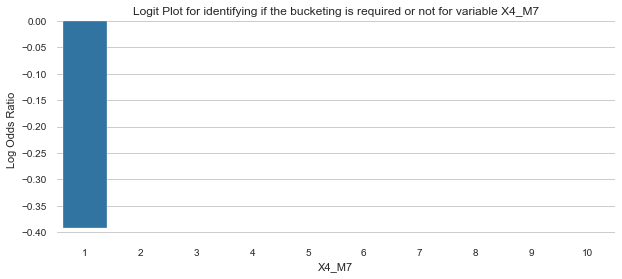

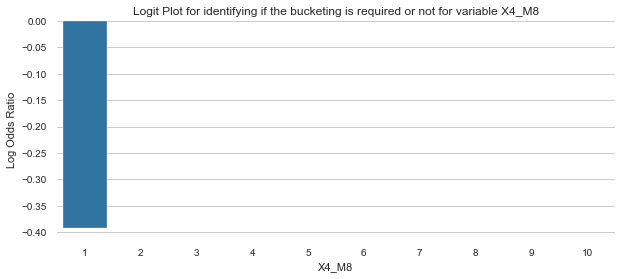

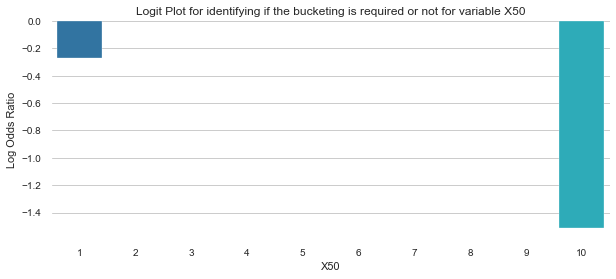

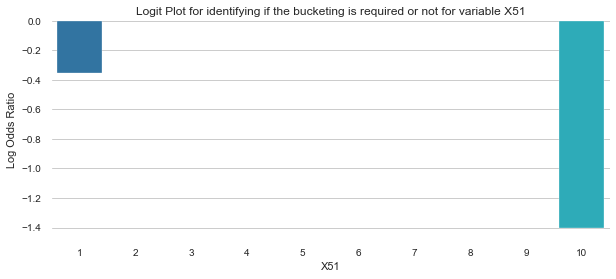

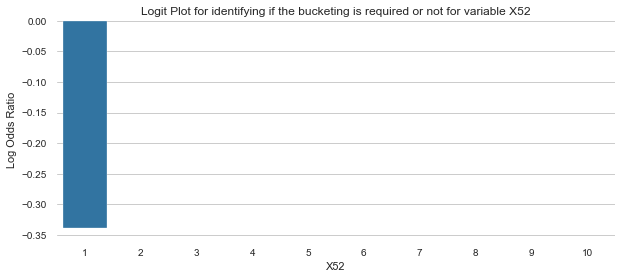

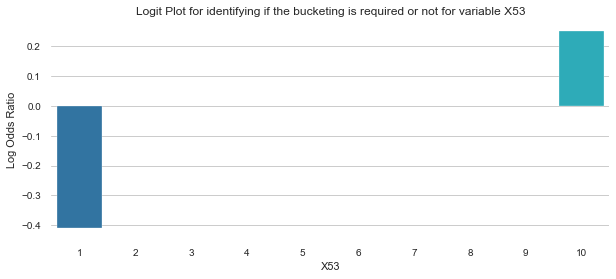

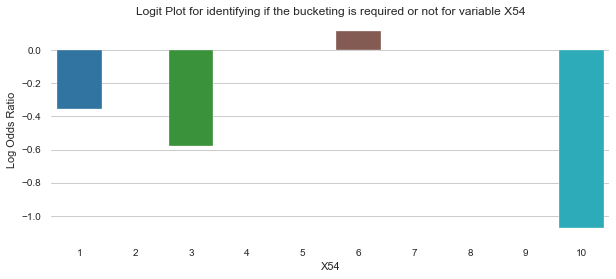

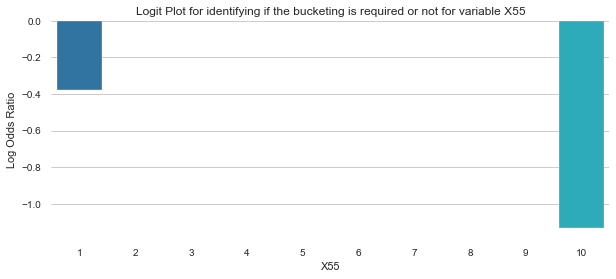

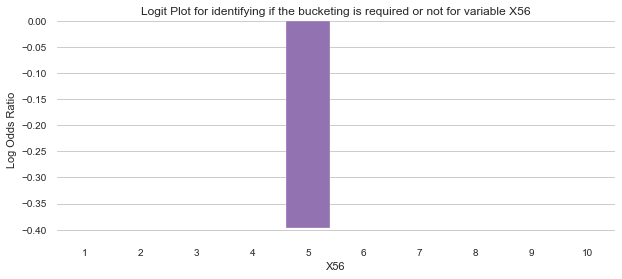

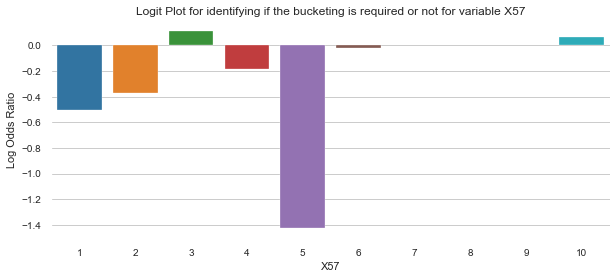

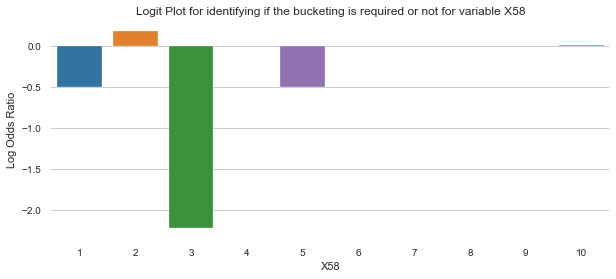

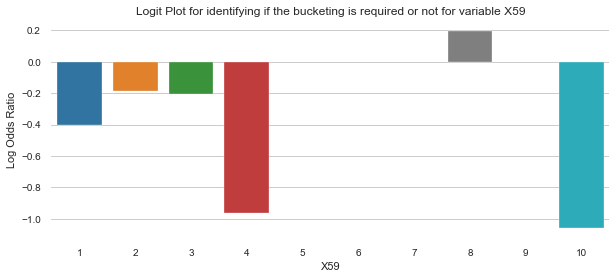

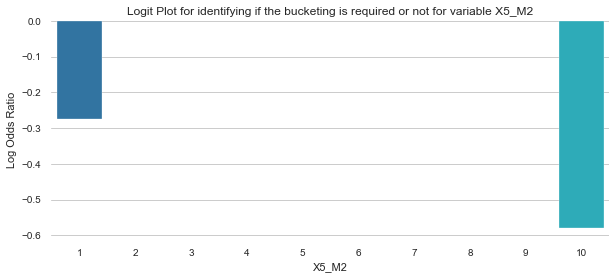

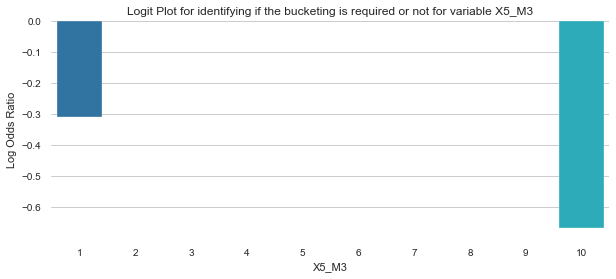

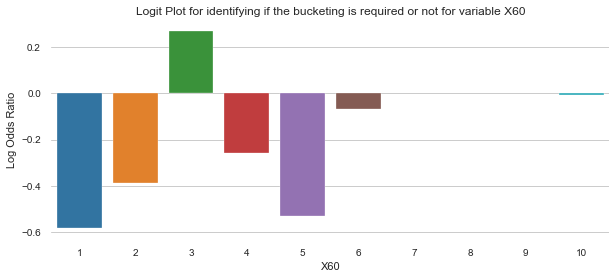

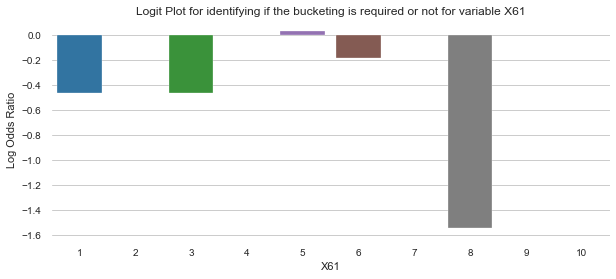

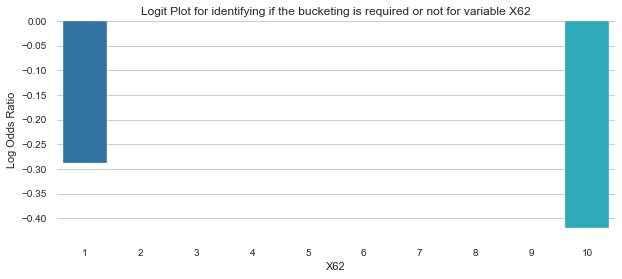

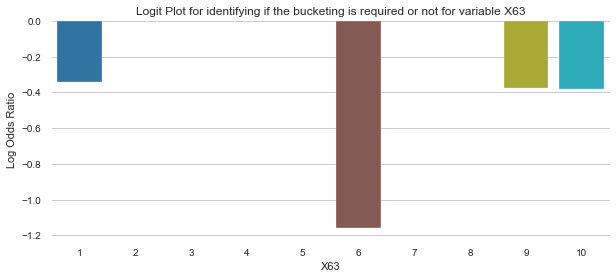

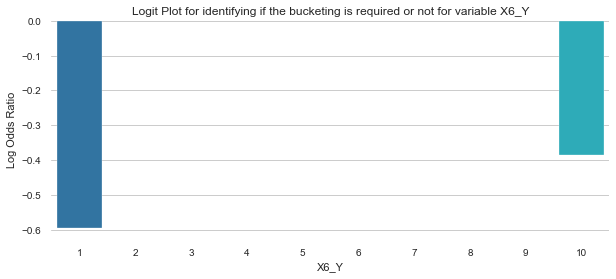

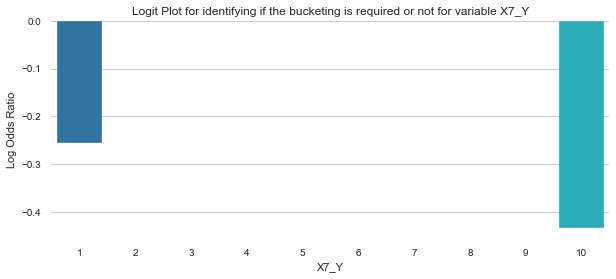

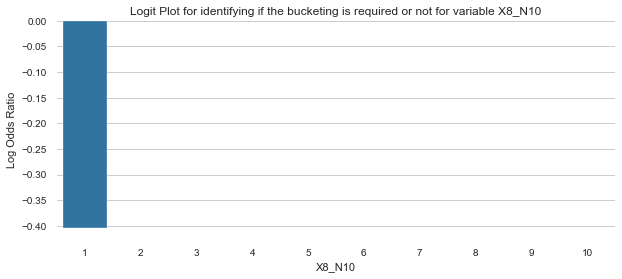

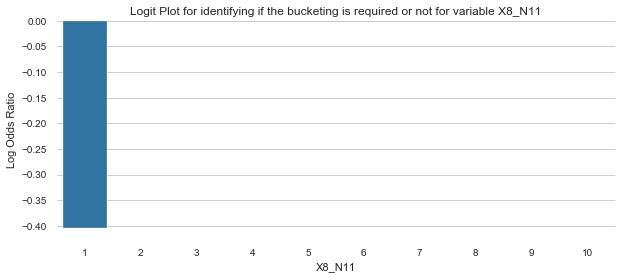

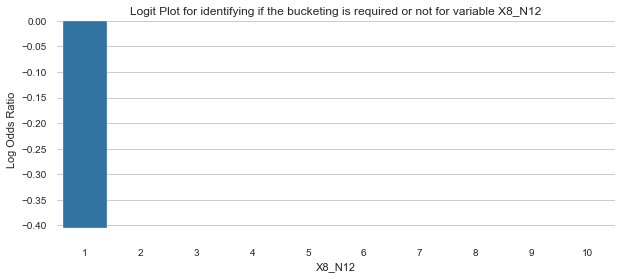

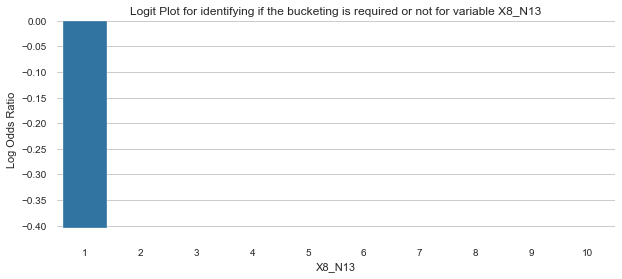

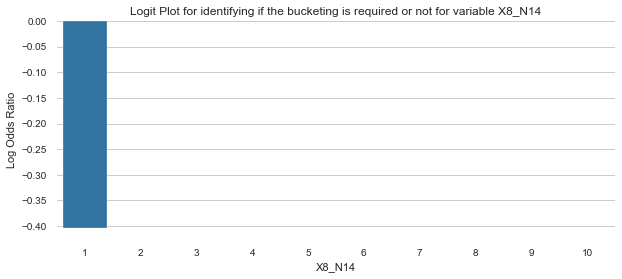

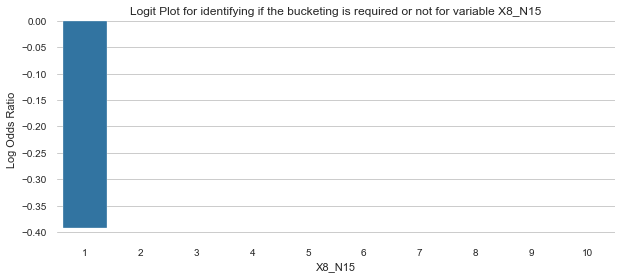

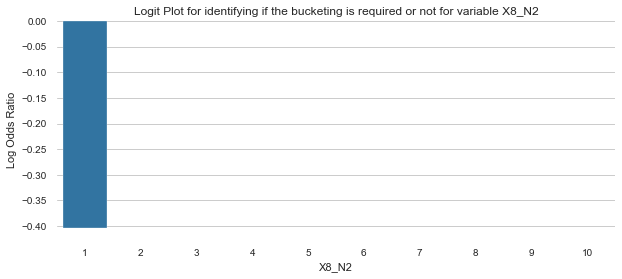

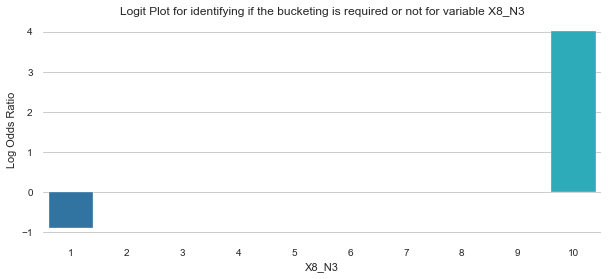

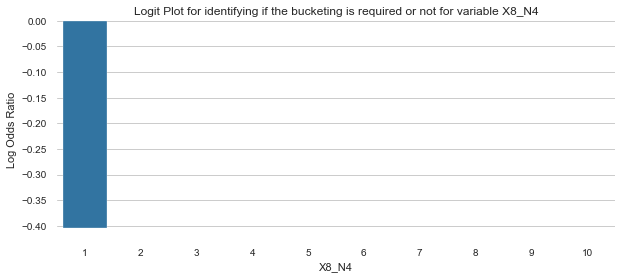

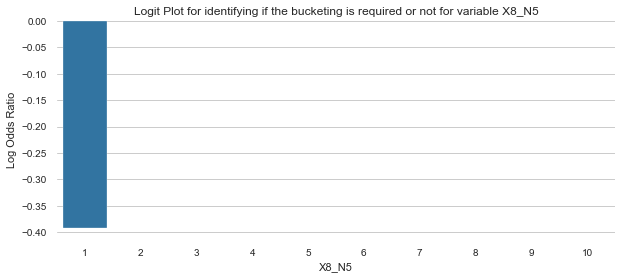

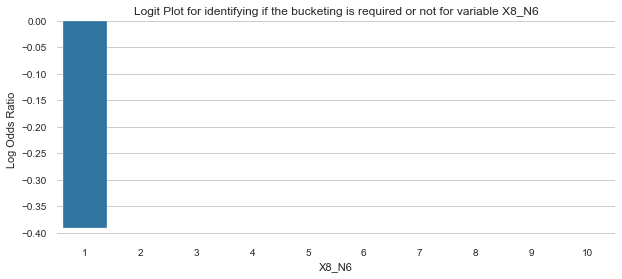

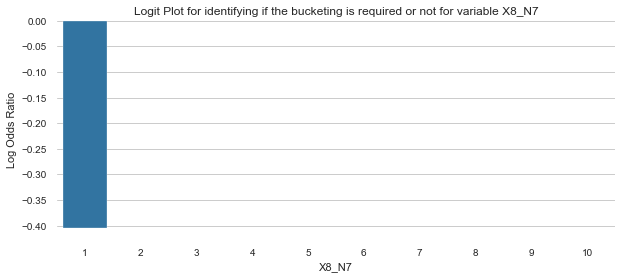

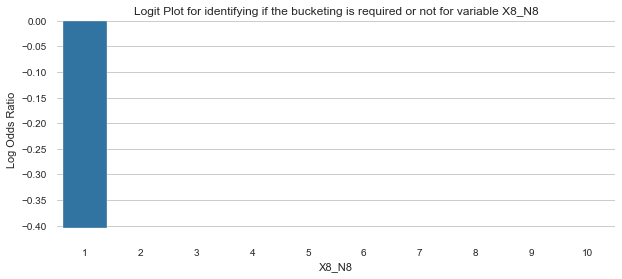

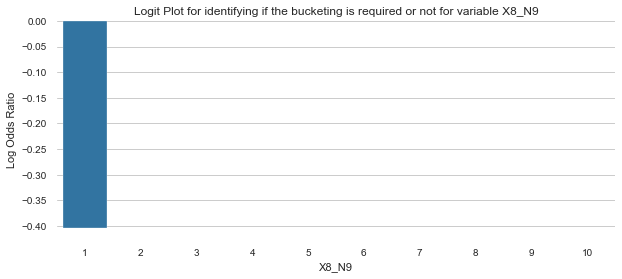

In [31]:
import sys
import warnings
from matplotlib.backends.backend_pdf import PdfPages

warnings.filterwarnings("ignore", category=RuntimeWarning) # Ignore RuntimeWarning
np.seterr(divide = 'ignore')                            # to stop divide by zero warning
plt.rcParams.update({'figure.max_open_warning': 0})     # to stop high memory usage warning

bp = PdfPages('WOE Plots.pdf')

for num_variable in train_new.columns.difference(['Y']):
    binned = pd.cut(train_new[num_variable], bins=10, labels=list(range(1,11)))
    odds = train_new.groupby(binned)['Y'].sum() / (train_new.groupby(binned)['Y'].count()-train_new.groupby(binned)['Y'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

#### Variable Reduction using Recursive Feature Elimination (RFE)

In [32]:
warnings.filterwarnings("ignore")  # Ignore ConvergenceWarning

X = train_new[train_new.columns.difference(['Y'])]
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, train_new['Y'] )
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False  True
  True  True False False  True False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False  True  True False False  True  True
 False False False  True  True]
[32 49 23 38 35 41 30 39 18 37 50 40 75 44 33  6 17  1  5 27 26 25 47  1
 19 31 28 74 72 62 60 66 56 69 16  1  1  1 21 14  1 70 65 71 57 67 59 73
 63 64 48  4  1 45 24 11  9 15 68 13 20 61 58 55 54 51 43 29 46 53 42 36
 52 22 34  1  1  2  1  1  7  3  1  1 10  8 12  1  1]


In [33]:
# capturing the important variables
RFE_features=X.columns[rfe.get_support()]
RFE_features

Index(['X27', 'X2_E', 'X3_X3', 'X3_X4', 'X3_X5', 'X40', 'X4_M4', 'X8_N10',
       'X8_N11', 'X8_N13', 'X8_N14', 'X8_N3', 'X8_N4', 'X8_N8', 'X8_N9'],
      dtype='object')

#### Variable reduction using Select K-Best technique

In [34]:
X = train_new[train_new.columns.difference(['Y'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['Y'] )

In [35]:
X_new.get_support()

array([False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False])

In [36]:
X_new.scores_

array([ 2.18093527e+02,  5.78156033e+03,  6.21165572e+03,  5.58255390e+03,
       -9.42072678e+00,  1.83063215e+03,  7.25598657e+03,  2.67267303e+02,
        3.45202861e+01,  1.15192273e+02,  1.96728499e+01,  6.32169438e+01,
                   nan,  8.85645745e+01,  1.21834224e+02,  4.55529007e+02,
        2.12638806e+02,  4.60658632e+03,  3.08142270e+03,  3.56363924e+03,
        8.75521272e+02,  1.60797471e+02,  1.26419258e+02,  4.82166384e+02,
        6.65445703e+03,  6.01449975e+03,  6.21346402e+03,  7.39795937e+02,
        3.74240078e+00,  4.65598242e+02,  4.53605450e+02,  3.26859423e+02,
        1.80309119e+01,  4.71690058e+02,  1.43710202e+02,  1.63322854e+02,
        1.54266326e+02,  1.55775207e+02,  1.55775207e+02,  6.82541548e+01,
        4.62589374e+02,  5.12754158e+02,  4.86457672e+02,  3.33030136e+02,
        1.00837858e+01,  4.37680841e+02,  1.34650756e+03,  1.01263633e+03,
        3.68553892e+01,  2.95776454e+02,  7.22684328e+01,  1.40602902e+02,
        2.15082076e+02,  

In [37]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['X11', 'X12', 'X13', 'X15', 'X16', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X46', 'X47', 'X50', 'X8_N3'],
      dtype='object')

#### Variance Inflation Factor assessment

In [38]:
X = pd.concat([train_new[train_new.columns.difference(['Y'])],train_new['Y']], axis=1)
features = "+".join(train_new.columns.difference(['Y']))
X.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_N15,X8_N2,X8_N3,X8_N4,X8_N5,X8_N6,X8_N7,X8_N8,X8_N9,Y
17325,-0.583532,-0.871743,-0.667059,-0.508283,-0.430126,-0.465904,0.000550,-0.001150,-0.001577,0.004883,...,0,0,0,0,0,0,0,0,0,0
13544,-0.583532,-0.373735,-0.021685,-0.087156,-0.430126,1.056343,-0.000388,-0.001163,-0.001239,-0.004759,...,0,0,0,0,0,0,0,0,0,1
49844,-0.583532,1.120288,1.269063,0.755097,-0.430126,4.100836,0.000015,-0.001170,-0.001236,-0.004753,...,0,0,0,0,0,0,0,0,0,0
16371,-0.583532,-0.373735,1.269063,-0.087156,-0.430126,2.578589,-0.000200,-0.001169,-0.001242,-0.004700,...,0,0,0,0,0,0,0,0,0,0
13084,-0.583532,-0.871743,-0.021685,-0.087156,-0.430126,-0.465904,0.000011,-0.001176,-0.001240,-0.004652,...,0,0,0,0,0,0,0,0,0,1


In [39]:
features

'X10+X11+X12+X13+X14+X15+X16+X17+X18+X19+X20+X21+X22+X23+X24+X25+X26+X27+X28+X29+X2_B+X2_C+X2_D+X2_E+X30+X31+X32+X33+X34+X35+X36+X37+X38+X39+X3_X2+X3_X3+X3_X4+X3_X5+X3_X6+X3_X7+X40+X41+X42+X43+X44+X45+X46+X47+X48+X49+X4_M2+X4_M3+X4_M4+X4_M5+X4_M6+X4_M7+X4_M8+X50+X51+X52+X53+X54+X55+X56+X57+X58+X59+X5_M2+X5_M3+X60+X61+X62+X63+X6_Y+X7_Y+X8_N10+X8_N11+X8_N12+X8_N13+X8_N14+X8_N15+X8_N2+X8_N3+X8_N4+X8_N5+X8_N6+X8_N7+X8_N8+X8_N9'

In [40]:
from patsy import dmatrices

In [41]:
a,b = dmatrices(formula_like='Y ~ '+'X10+X11+X12+X13+X14+X15+X16+X17+X18+X19+X20+X21+X22+X23+X24+X25+X26+X27+X28+X29+X2_B+X2_C+X2_D+X2_E+X30+X31+X32+X33+X34+X35+X36+X37+X38+X39+X3_X2+X3_X3+X3_X4+X3_X5+X3_X6+X3_X7+X40+X41+X42+X43+X44+X45+X46+X47+X48+X49+X4_M2+X4_M3+X4_M4+X4_M5+X4_M6+X4_M7+X4_M8+X50+X51+X52+X53+X54+X55+X56+X57+X58+X59+X5_M2+X5_M3+X60+X61+X62+X63+X6_Y+X7_Y+X8_N10+X8_N11+X8_N12+X8_N13+X8_N14+X8_N15+X8_N2+X8_N3+X8_N4+X8_N5+X8_N6+X8_N7+X8_N8+X8_N9',data=train_new,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor   features
0     0.000000  Intercept
1     1.475875        X10
2     7.896565        X11
3     9.645431        X12
4     9.009738        X13
..         ...        ...
85    1.258862      X8_N5
86    1.067898      X8_N6
87         inf      X8_N7
88    1.051736      X8_N8
89    1.781568      X8_N9

[90 rows x 2 columns]


In [42]:
vif_col =  vif[vif['VIF Factor']<=4]['features'].values

In [43]:
vif_col

array(['Intercept', 'X10', 'X14', 'X15', 'X16', 'X19', 'X20', 'X21',
       'X24', 'X25', 'X26', 'X2_B', 'X2_C', 'X2_D', 'X2_E', 'X33', 'X34',
       'X35', 'X36', 'X37', 'X38', 'X39', 'X3_X4', 'X3_X5', 'X3_X6',
       'X3_X7', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47',
       'X48', 'X49', 'X4_M2', 'X4_M3', 'X4_M4', 'X4_M5', 'X4_M6', 'X4_M7',
       'X4_M8', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57',
       'X58', 'X59', 'X5_M2', 'X5_M3', 'X60', 'X61', 'X6_Y', 'X8_N10',
       'X8_N11', 'X8_N12', 'X8_N13', 'X8_N14', 'X8_N15', 'X8_N3', 'X8_N4',
       'X8_N5', 'X8_N6', 'X8_N8', 'X8_N9'], dtype=object)

In [44]:
len(vif_col)

70

In [45]:
vif.sort_values('VIF Factor',ascending=True).head(10).features

0     Intercept
11          X20
33          X38
64          X56
5           X14
80       X8_N14
39        X3_X6
88        X8_N8
76       X8_N10
81       X8_N15
Name: features, dtype: object

### Final list of variable selected for the model building from above steps

In [46]:
train=train_new
test=test_new

## Model Building

In [47]:
top_features=['X10', 'X14', 'X15', 'X16', 'X19', 'X20', 'X21','X24', 'X25', 'X26', 'X2_B', 'X2_C', 'X2_D', 'X2_E', 'X33', 'X34','X35', 'X36', 'X37', 'X38', 'X39', 'X3_X4', 'X3_X5', 'X3_X6','X3_X7', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47','X48', 'X49', 'X4_M2', 'X4_M3', 'X4_M4', 'X4_M5', 'X4_M6', 'X4_M7','X4_M8', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57','X58', 'X59', 'X5_M2', 'X5_M3', 'X60', 'X61', 'X6_Y', 'X8_N10','X8_N11', 'X8_N12', 'X8_N13', 'X8_N14', 'X8_N15', 'X8_N3', 'X8_N4','X8_N5', 'X8_N6', 'X8_N8', 'X8_N9']
X_train = train[top_features]
y_train = train['Y']
X_test = test[top_features]
y_test = test['Y']

### Building logistic Regression

#### 1) LogisticRegression

In [48]:
lr_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [49]:
lr_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
lr_clf.predict_proba(X_train)

array([[0.60780606, 0.39219394],
       [0.77585616, 0.22414384],
       [0.93134586, 0.06865414],
       ...,
       [0.79073444, 0.20926556],
       [0.68688453, 0.31311547],
       [0.87568605, 0.12431395]])

In [51]:
lr_clf.score(X_train, y_train)

0.7932285714285714

In [52]:
lr_clf1 = LogisticRegression(random_state=0).fit(X_test, y_test)

In [53]:
lr_clf1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
lr_clf1.predict_proba(X_test)

array([[0.66021678, 0.33978322],
       [0.68509193, 0.31490807],
       [0.65875219, 0.34124781],
       ...,
       [0.62117385, 0.37882615],
       [0.74159377, 0.25840623],
       [0.02536819, 0.97463181]])

In [55]:
lr_clf1.score(X_test, y_test)

0.7886666666666666

#### 2) RidgeClassifier

In [56]:
from sklearn.linear_model import RidgeClassifier

In [57]:
rc_clf = RidgeClassifier().fit(X_train, y_train)

In [58]:
rc_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
rc_clf.score(X_train, y_train)

0.7903142857142857

### K-Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [62]:
print(k_neigh.predict(X_train))

[0 1 0 ... 0 0 0]


In [63]:
print(k_neigh.predict_proba(X_train))

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [64]:
k_neigh.score(X_train, y_train) 

1.0

In [65]:
k_neigh1 = KNeighborsClassifier(n_neighbors=3)
k_neigh1.fit(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [66]:
print(k_neigh1.predict(X_test))

[0 0 0 ... 1 0 1]


In [67]:
print(k_neigh1.predict_proba(X_test))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [68]:
k_neigh1.score(X_test, y_test) 

1.0

### Decision Trees

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [70]:
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [71]:
pd.DataFrame(clf_tree.predict_proba(X_train)).head()

,0,1
0,0.913295,0.086705
1,0.830127,0.169873
2,0.776265,0.223735
3,0.776265,0.223735
4,0.477626,0.522374


In [72]:
pd.DataFrame(clf_tree.predict_proba(X_train))[1]

0        0.086705
1        0.169873
2        0.223735
3        0.223735
4        0.522374
           ...   
34995    0.522374
34996    0.086705
34997    0.086705
34998    0.086705
34999    0.223735
Name: 1, Length: 35000, dtype: float64

In [73]:
pred = pd.DataFrame(clf_tree.predict( X_train ), index=X_train.index)

In [74]:
tree_train_pred = pd.concat([y_train, pred], axis=1)

In [75]:
tree_train_pred.columns = ['actual', 'predicted']

In [76]:
tree_train_pred.head()

,actual,predicted
17325,0,0
13544,1,0
49844,0,0
16371,0,0
13084,1,1


In [77]:
pred_test = pd.DataFrame(clf_tree.predict( X_test ), index=X_test.index)
tree_test_pred = pd.concat([y_test, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

,actual,predicted
11872,0,0
40828,0,0
36400,0,0
5166,0,1
30273,1,1


In [78]:
print("Train Accuracy:")
print(metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted ))

print("Test Accuracy:")
print(metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted ))

Train Accuracy:
0.8272
Test Accuracy:
0.8232


Text(0.5, 12.5, 'Predicted label')

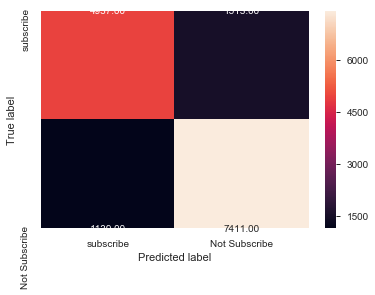

In [79]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["subscribe", "Not Subscribe"] , yticklabels = ["subscribe", "Not Subscribe"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Fine Tuning the parameters

In [80]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [81]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
             

In [82]:
tree1 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree1.fit( X_test, y_test )

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
             

In [83]:
tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
tree1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
tree.best_params_

{'max_depth': 8, 'max_features': 8}

In [86]:
tree1.best_params_

{'max_depth': 8, 'max_features': 8}

In [87]:
train_pred = tree.predict(X_train)

In [88]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     20926
           1       0.89      0.71      0.79     14074

    accuracy                           0.85     35000
   macro avg       0.86      0.82      0.83     35000
weighted avg       0.85      0.85      0.84     35000



In [89]:
test_pred = tree.predict(X_test)

In [90]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      8924
           1       0.89      0.71      0.79      6076

    accuracy                           0.85     15000
   macro avg       0.86      0.82      0.83     15000
weighted avg       0.85      0.85      0.84     15000



### Building Final Decision Tree Model

In [91]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=7 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
clf_tree1 = DecisionTreeClassifier( max_depth = 8, max_features=7 )
clf_tree1.fit( X_test, y_test )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Feature Relative Importance

In [93]:
clf_tree.feature_importances_

array([0.        , 0.        , 0.10412639, 0.23292811, 0.02569161,
       0.        , 0.09004576, 0.05433312, 0.05794858, 0.0600069 ,
       0.03381123, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448894, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01121609, 0.        , 0.        ,
       0.        , 0.        , 0.00858643, 0.        , 0.01696308,
       0.00960281, 0.        , 0.        , 0.        , 0.        ,
       0.03093489, 0.02482316, 0.        , 0.00483064, 0.01185956,
       0.05390857, 0.00341415, 0.        , 0.        , 0.        ,
       0.        , 0.0109442 , 0.        , 0.11953578, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [94]:
clf_tree1.feature_importances_

array([4.70573749e-03, 0.00000000e+00, 1.12878978e-01, 3.20048899e-01,
       3.22031965e-02, 0.00000000e+00, 5.43872949e-02, 5.28077467e-02,
       3.65917360e-02, 2.90668394e-02, 3.17361009e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.42869076e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.08637788e-04,
       0.00000000e+00, 0.00000000e+00, 1.06221674e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.00490016e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.18256307e-02, 1.20564237e-02, 1.02234194e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [95]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('X10', 0.0),
 ('X14', 0.0),
 ('X15', 0.10412638681088073),
 ('X16', 0.23292810979424888),
 ('X19', 0.025691607023031228),
 ('X20', 0.0),
 ('X21', 0.09004576383855122),
 ('X24', 0.05433311610897285),
 ('X25', 0.057948577982966445),
 ('X26', 0.06000690039624951),
 ('X2_B', 0.033811229080600934),
 ('X2_C', 0.0),
 ('X2_D', 0.0),
 ('X2_E', 0.0),
 ('X33', 0.0),
 ('X34', 0.0),
 ('X35', 0.0),
 ('X36', 0.0),
 ('X37', 0.0),
 ('X38', 0.0),
 ('X39', 0.0),
 ('X3_X4', 0.0),
 ('X3_X5', 0.0),
 ('X3_X6', 0.0),
 ('X3_X7', 0.0),
 ('X40', 0.03448894135341888),
 ('X41', 0.0),
 ('X42', 0.0),
 ('X43', 0.0),
 ('X44', 0.0),
 ('X45', 0.0),
 ('X46', 0.0),
 ('X47', 0.0),
 ('X48', 0.0),
 ('X49', 0.0),
 ('X4_M2', 0.0),
 ('X4_M3', 0.0),
 ('X4_M4', 0.011216085912411659),
 ('X4_M5', 0.0),
 ('X4_M6', 0.0),
 ('X4_M7', 0.0),
 ('X4_M8', 0.0),
 ('X50', 0.00858643235169253),
 ('X51', 0.0),
 ('X52', 0.016963079495571083),
 ('X53', 0.009602812831083711),
 ('X54', 0.0),
 ('X55', 0.0),
 ('X56', 0.0),
 ('X57', 0.0),
 ('X58', 0

In [96]:
# summarize the selection of the attributes
import itertools
feature_map1 = [(i, v) for i, v in itertools.zip_longest(X_test.columns, clf_tree1.feature_importances_)]

feature_map1

[('X10', 0.004705737493695826),
 ('X14', 0.0),
 ('X15', 0.1128789775651272),
 ('X16', 0.32004889893319044),
 ('X19', 0.0322031965167441),
 ('X20', 0.0),
 ('X21', 0.0543872948541445),
 ('X24', 0.05280774666837525),
 ('X25', 0.03659173598701929),
 ('X26', 0.029066839388309677),
 ('X2_B', 0.03173610087023102),
 ('X2_C', 0.0),
 ('X2_D', 0.0),
 ('X2_E', 0.0),
 ('X33', 0.0),
 ('X34', 0.0),
 ('X35', 0.0),
 ('X36', 0.0),
 ('X37', 0.0),
 ('X38', 0.0),
 ('X39', 0.0),
 ('X3_X4', 0.0),
 ('X3_X5', 0.0),
 ('X3_X6', 0.0),
 ('X3_X7', 0.0),
 ('X40', 0.01428690762166654),
 ('X41', 0.0),
 ('X42', 0.0),
 ('X43', 0.0),
 ('X44', 0.0),
 ('X45', 0.0),
 ('X46', 0.0),
 ('X47', 0.0),
 ('X48', 0.0),
 ('X49', 0.0),
 ('X4_M2', 0.00010863778777752501),
 ('X4_M3', 0.0),
 ('X4_M4', 0.0),
 ('X4_M5', 0.0010622167363778853),
 ('X4_M6', 0.0),
 ('X4_M7', 0.0),
 ('X4_M8', 0.0),
 ('X50', 0.0),
 ('X51', 0.0),
 ('X52', 0.08004900164178266),
 ('X53', 0.0),
 ('X54', 0.0),
 ('X55', 0.0),
 ('X56', 0.0),
 ('X57', 0.0318256307415865

In [97]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
3,X16,0.232928
63,X8_N3,0.119536
2,X15,0.104126
6,X21,0.090046
9,X26,0.060007
...,...,...
33,X48,0.000000
1,X14,0.000000
35,X4_M2,0.000000
36,X4_M3,0.000000


In [98]:
Feature_importance1 = pd.DataFrame(feature_map1, columns=['Feature', 'importance'])
Feature_importance1.sort_values('importance', inplace=True, ascending=False)
Feature_importance1

,Feature,importance
3,X16,0.320049
63,X8_N3,0.164503
2,X15,0.112879
44,X52,0.080049
6,X21,0.054387
...,...,...
32,X47,0.000000
33,X48,0.000000
1,X14,0.000000
36,X4_M3,0.000000


In [99]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [100]:
tree_test_pred.sample( n = 10 )

,actual,predicted
7922,1,1
46929,0,0
20812,0,0
8866,0,0
17693,0,0
28842,0,0
39256,1,1
31676,0,0
8208,0,0
17965,1,1


In [101]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8956

Text(0.5, 12.5, 'Predicted label')

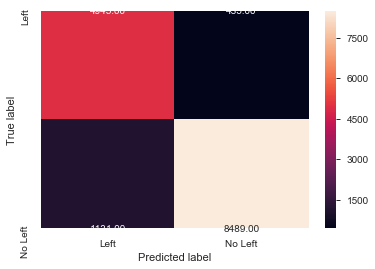

In [102]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Random Forest Model

In [103]:
from sklearn.ensemble import RandomForestClassifier


In [104]:
gscv_rf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
gscv_results = gscv_rf.fit( X_test, y_test )

In [105]:
gscv_results.best_params_

{'max_depth': 8, 'max_features': 7}

In [106]:
gscv_rf.best_score_

0.8592666666666666

In [107]:
radm_clf = RandomForestClassifier(max_depth=8, max_features=7)
radm_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
radm_clf.n_features_

69

In [109]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( X_test ) } )

In [110]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.9945333333333334
0.9932521395655036


## Naive Bayes Model
#### 1) BernoulliNB

In [111]:
from sklearn.naive_bayes import BernoulliNB

In [112]:
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [113]:
bnb_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

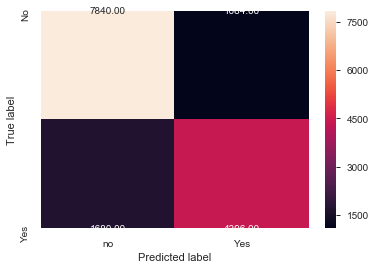

In [114]:
nb_cm = metrics.confusion_matrix( y_test,bnb_clf.predict( X_test) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [115]:
metrics.accuracy_score( y_test, bnb_clf.predict( X_test ) )

0.8157333333333333

#### 2) GaussianNB

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
gnb_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

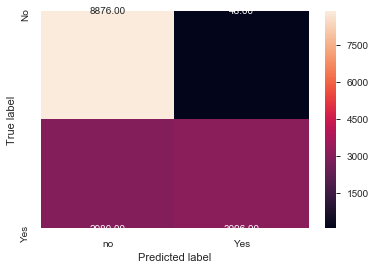

In [119]:
nb_cm = metrics.confusion_matrix( y_test,gnb_clf.predict( X_test) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [120]:
metrics.accuracy_score( y_test, bnb_clf.predict( X_test ) )

0.8157333333333333

### Support Vector Machine (SVM)
#### 1) LinearSVC

from sklearn.svm import LinearSVC

svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train, y_train)

print(svm_clf.coef_)

print(svm_clf.intercept_)

print(svm_clf.predict(X_train))

#### 2) SVC

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

model.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],
              'gamma': [0.0001, 0.001]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)

print(grid.best_params_)

model = grid.best_estimator_
yfit = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Stochastic Gradient Descent (SGD)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [122]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
model.score(X_test, y_test)

0.8167333333333333

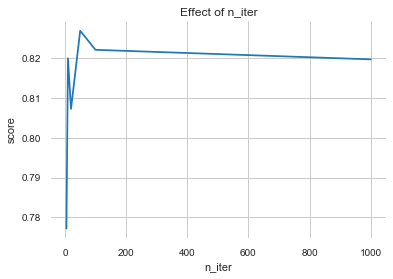

In [125]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

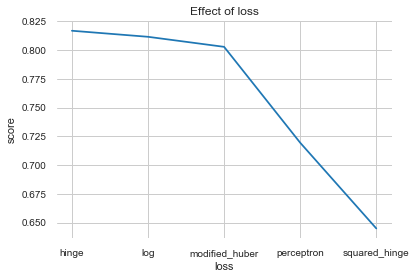

In [126]:
# losses
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.xlabel("loss")
plt.ylabel("score")
plt.title("Effect of loss")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores)

In [127]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "perceptron", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)

In [128]:
clf.fit(X_train, y_train)
print(clf.best_score_)

0.8499428571428572


In [129]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [130]:
clf.score(X_test, y_test)

0.8286666666666667

### Bagging Algorithms

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

1) Bagged Decision Trees

2) Random Forest

3) Extra Trees

#### 1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

In [131]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [132]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

1.0


In [133]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results7 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results7.mean())

1.0


#### 2. Random Forest
Random forest is an extension of bagged decision trees.

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

1.0


In [136]:
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results9 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results9.mean())

1.0


#### 3. Extra Trees
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

In [137]:
from sklearn.ensemble import ExtraTreesClassifier

In [138]:
seed = 7
num_trees = 100
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

1.0


In [139]:
seed = 7
num_trees = 100
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results11 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results11.mean())

1.0


### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1) AdaBoost

2) Stochastic Gradient Boosting

#### 1. AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [141]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9187142857142858


In [142]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results1 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results1.mean())

0.9278666666666666


#### 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

1.0


In [145]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results2 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results2.mean())

1.0


### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [147]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9187142857142858


In [148]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results3 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results.mean())

0.9187142857142858


In [149]:
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

1.0


In [151]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results4 = model_selection.cross_val_score(model, X_test, y_test, cv=kfold)
print(results4.mean())

1.0


In [152]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [153]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.9813714285714286


In [154]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results5 = model_selection.cross_val_score(ensemble, X_test, y_test, cv=kfold)
print(results5.mean())

0.9946666666666667


In [155]:
train_Gini = 2*metrics.roc_auc_score(train.Y, train_pred)-1
print(train_Gini)

0.6497582493300014


In [156]:
test_Gini = 2*metrics.roc_auc_score(test.Y, test_pred)-1
print(test_Gini)

0.6484590525095395
